# Linear Classification

The code is obtained from a Udemy course (PyTorch: Deep Learning and Artificial Intelligence).

The code is also complementary to notes found in Obsidian.

In [34]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [35]:
# load breast cancer data from sklearn
data = load_breast_cancer()
print("Type of data:", type(data))
print("Data keys:", data.keys())
print("Shape:", data.data.shape)
print("Target shape:", data.target.shape)
print("Target names:", data.target_names)
print("Feature names:", data.feature_names)

Type of data: <class 'sklearn.utils.Bunch'>
Data keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Shape: (569, 30)
Target shape: (569,)
Target names: ['malignant' 'benign']
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [36]:
# print the description of the data
print(data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [37]:
# split data into sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)
N, D = X_train.shape

In [38]:
# normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # fit and transform
X_test = scaler.transform(X_test)       # only transform

In [39]:
# build model
model = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

In [40]:
# loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [41]:
# convert data to tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [42]:
# train the model
num_epochs = 1000
train_losses = np.zeros(num_epochs)
test_losses = np.zeros(num_epochs)

for it in range(num_epochs):
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # backward and optimize
    loss.backward()
    optimizer.step()

    # get test loss
    outputs_test = model(X_test)
    loss_test = criterion(outputs_test, y_test)

    # save the loss
    train_losses[it] = loss.item()
    test_losses[it] = loss_test.item()

    if (it + 1) % 100 == 0:
        print(f'Epoch {it + 1}/{num_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss.item():.4f}')

Epoch 100/1000, Train Loss: 0.5033, Test Loss: 0.5033
Epoch 200/1000, Train Loss: 0.3235, Test Loss: 0.3235
Epoch 300/1000, Train Loss: 0.2463, Test Loss: 0.2463
Epoch 400/1000, Train Loss: 0.2028, Test Loss: 0.2028
Epoch 500/1000, Train Loss: 0.1751, Test Loss: 0.1751
Epoch 600/1000, Train Loss: 0.1560, Test Loss: 0.1560
Epoch 700/1000, Train Loss: 0.1420, Test Loss: 0.1420
Epoch 800/1000, Train Loss: 0.1312, Test Loss: 0.1312
Epoch 900/1000, Train Loss: 0.1227, Test Loss: 0.1227
Epoch 1000/1000, Train Loss: 0.1157, Test Loss: 0.1157


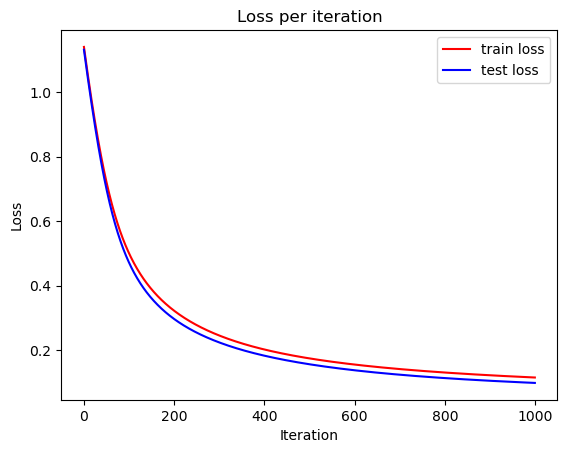

In [46]:
# plot test loss and train loss per iteration
plt.plot(train_losses, label='train loss', c = "red")
plt.plot(test_losses, label='test loss', c = "blue")
plt.title("Loss per iteration")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [62]:
# get accuracy for train and test set
with torch.no_grad():
    p_train = model(X_train)
    print("Model prediction on train:", p_train[:3].T[0])
    p_train = np.round(p_train.numpy())
    print("Rounded prediction on train:", p_train[:3].T)
    train_acc = np.mean(y_train.numpy() == p_train)

    p_test = model(X_test)
    print("Model prediction on test:", p_test[:3].T[0])
    p_test = np.round(p_test.numpy())
    print("Rounded prediction on test:", p_test[:3].T[0])
    test_acc = np.mean(y_test.numpy() == p_test)

print(f'Train accuracy: {train_acc:.4f}, Test accuracy: {test_acc:.4f}')

Model prediction on train: tensor([7.9165e-01, 3.5973e-05, 9.9827e-01])
Rounded prediction on train: [[1. 0. 1.]]
Model prediction on test: tensor([0.7586, 0.0069, 0.0689])
Rounded prediction on test: [1. 0. 0.]
Train accuracy: 0.9780, Test accuracy: 0.9912
